In [1]:
import pyextractMS
from matplotlib import pylab as plt

In [2]:
mass_accuracy = 0.01
rt_window = 1.5
rawfile_name = '0.raw'
mz_offset = 0.5
ms1_extraction_rt_window=0.1

iRT_peptides = {
                'HVLTSIGEK':[496.2867,30],
                'DIPVPKPK':[451.2835,36.5],
                'IGDYAGIK':[422.7364,40.5],
                'TASEFDSAIAQDK':[695.8324,46.75],
                'SAAGAFGPELSR':[586.8003,49.5],
                'SFANQPLEVVYSK':[745.3925,60.5],
                'ELASGLSFPVGFK':[680.3736,74.5],
                'LSSEAPALFQFDLK':[787.4212,78.5],
               }

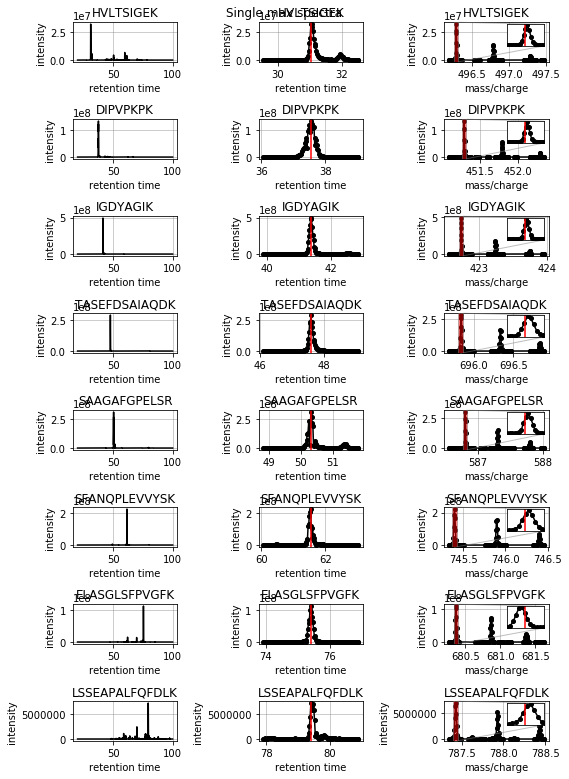

In [11]:
##MAX METHOD
f = plt.figure(figsize = (16,22))
axes = f.subplots(len(iRT_peptides.keys()), 3)
for plot_num, peptide in enumerate(iRT_peptides.keys()):
    m_z = iRT_peptides[peptide][0]
    rt = iRT_peptides[peptide][1]
    full_xic = pyextractMS.get_xic(mz_range=[m_z-mass_accuracy,m_z+mass_accuracy], rawfile_name=rawfile_name,
                                   retention_time_range=[20, 100])
    peak_max_rt, peak_max_intensity = pyextractMS.get_max_rt(full_xic)
    
    target_xic = pyextractMS.get_xic(mz_range=[m_z-mass_accuracy,m_z+mass_accuracy], rawfile_name=rawfile_name, 
                                    retention_time_range=[peak_max_rt-rt_window, peak_max_rt+rt_window])
    
    pyextractMS.plot_xic(full_xic, title=peptide, fig_ax=axes[plot_num,0], circle_size=0)
    pyextractMS.plot_xic(target_xic, title=peptide, fig_ax=axes[plot_num,1], circle_size=4)
    axes[plot_num,1].axvline(peak_max_rt, color='red')
    
    spectra = pyextractMS.extract_ms1(rawfile_name, [m_z-mz_offset/2, m_z+mz_offset*2.5], 
                                      peak_max_rt, sum_spectra=True, interp=False)
    pyextractMS.plot_ms_spectra(spectra, title=peptide, fig_ax=axes[plot_num,2], circle_size=4)
    # sub region of the original image
    axins = axes[plot_num,2].inset_axes([0.6, 0.4, 0.35, 0.55])
    pyextractMS.plot_ms_spectra(spectra, fig_ax=axins, title='', x_label='', y_label='', circle_size=4)
    axins.set_xlim([m_z-.03, m_z+.03])
    axins.set_xticks([])
    axins.set_yticks([])
    axins.axvline(m_z, color='red')
    axes[plot_num,2].indicate_inset_zoom(axins, facecolor='red')

f.suptitle('Single max spectra')
plt.tight_layout()
f.subplots_adjust(top=0.96)

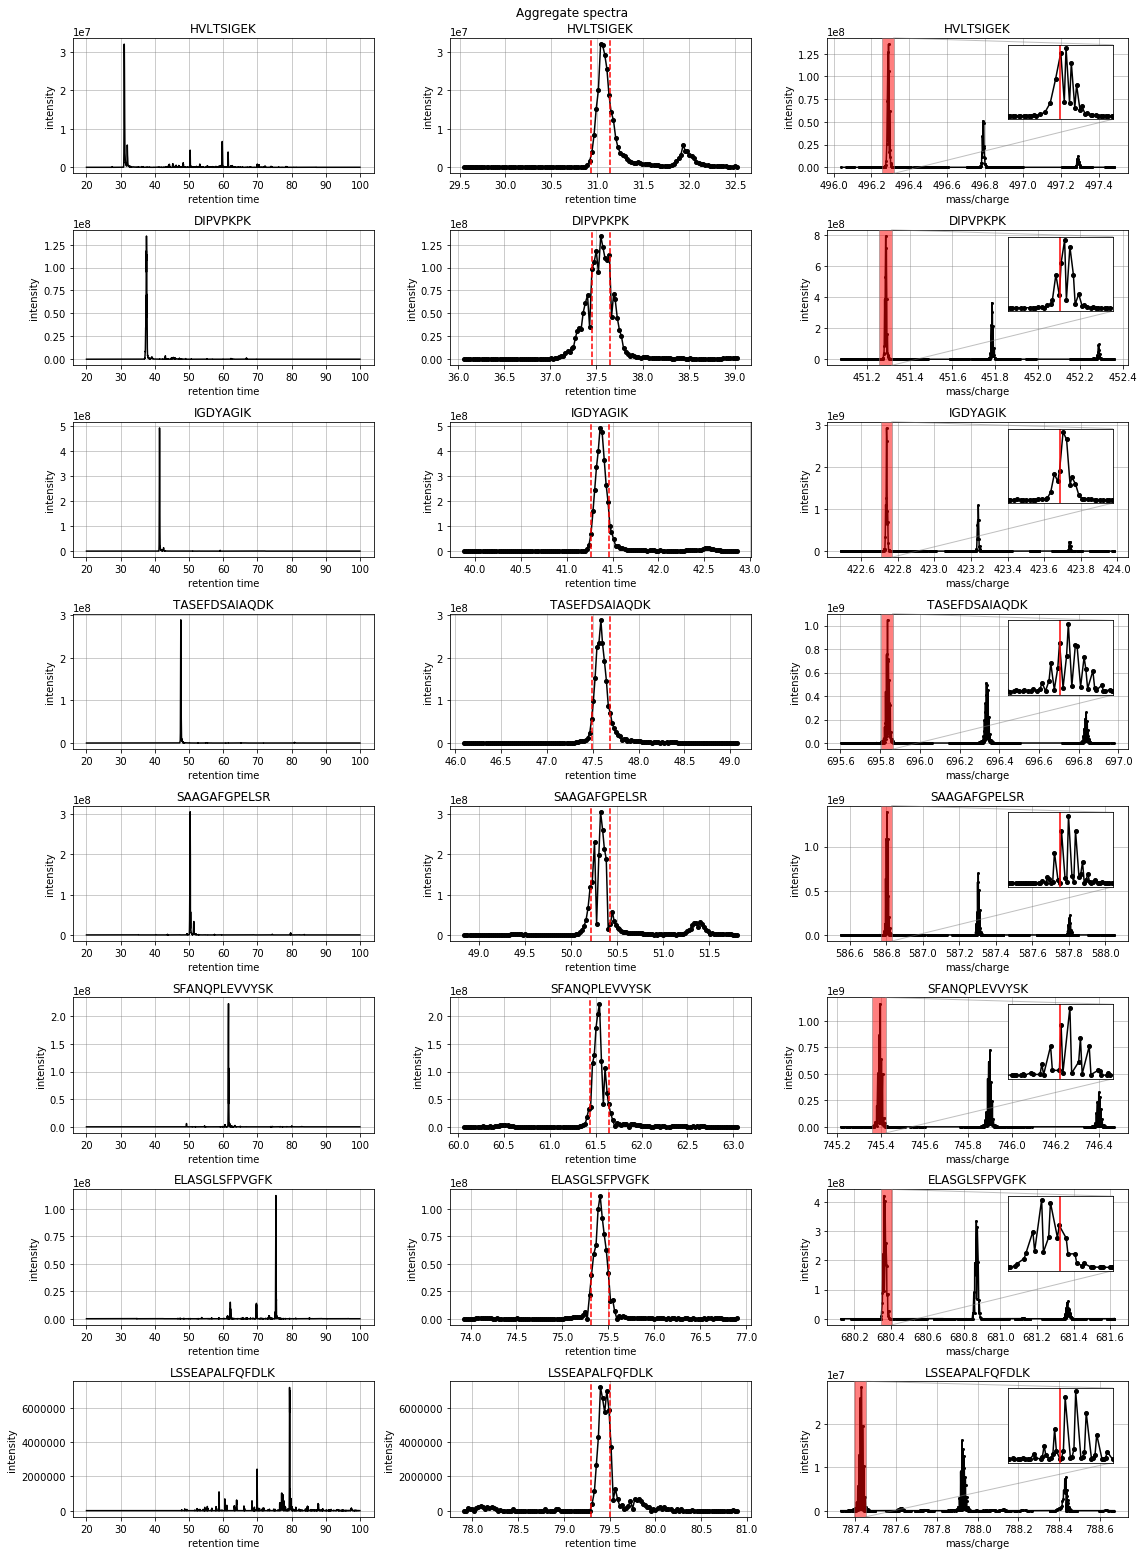

In [7]:
##AGGREGATE
f = plt.figure(figsize = (16,22))
axes = f.subplots(len(iRT_peptides.keys()), 3)
for plot_num, peptide in enumerate(iRT_peptides.keys()):
    m_z = iRT_peptides[peptide][0]
    rt = iRT_peptides[peptide][1]
    full_xic = pyextractMS.get_xic(mz_range=[m_z-mass_accuracy,m_z+mass_accuracy], rawfile_name=rawfile_name,
                                   retention_time_range=[20, 100])
    peak_max_rt, peak_max_intensity = pyextractMS.get_max_rt(full_xic)
    
    target_xic = pyextractMS.get_xic(mz_range=[m_z-mass_accuracy,m_z+mass_accuracy], rawfile_name=rawfile_name, 
                                    retention_time_range=[peak_max_rt-rt_window, peak_max_rt+rt_window])
    
    pyextractMS.plot_xic(full_xic, title=peptide, fig_ax=axes[plot_num,0], circle_size=0)
    pyextractMS.plot_xic(target_xic, title=peptide, fig_ax=axes[plot_num,1], circle_size=4)
    axes[plot_num,1].axvline(peak_max_rt-ms1_extraction_rt_window, linestyle='--', color='red')
    axes[plot_num,1].axvline(peak_max_rt+ms1_extraction_rt_window, linestyle='--', color='red')
    
    spectra = pyextractMS.extract_ms1(rawfile_name, [m_z-mz_offset/2, m_z+mz_offset*2.5], 
                                      [peak_max_rt-ms1_extraction_rt_window, peak_max_rt+ms1_extraction_rt_window], 
                                      sum_spectra=False, interp=False)
    pyextractMS.plot_ms_spectra(spectra, title=peptide, fig_ax=axes[plot_num,2], circle_size=2)
    # sub region of the original image
    axins = axes[plot_num,2].inset_axes([0.6, 0.4, 0.35, 0.55])
    pyextractMS.plot_ms_spectra(spectra, fig_ax=axins, title='', x_label='', y_label='', circle_size=4)
    axins.set_xlim([m_z-.03, m_z+.03])
    axins.set_xticks([])
    axins.set_yticks([])
    axins.axvline(m_z, color='red')
    axes[plot_num,2].indicate_inset_zoom(axins, facecolor='red')
    
f.suptitle('Aggregate spectra')
plt.tight_layout() 
f.subplots_adjust(top=0.96)

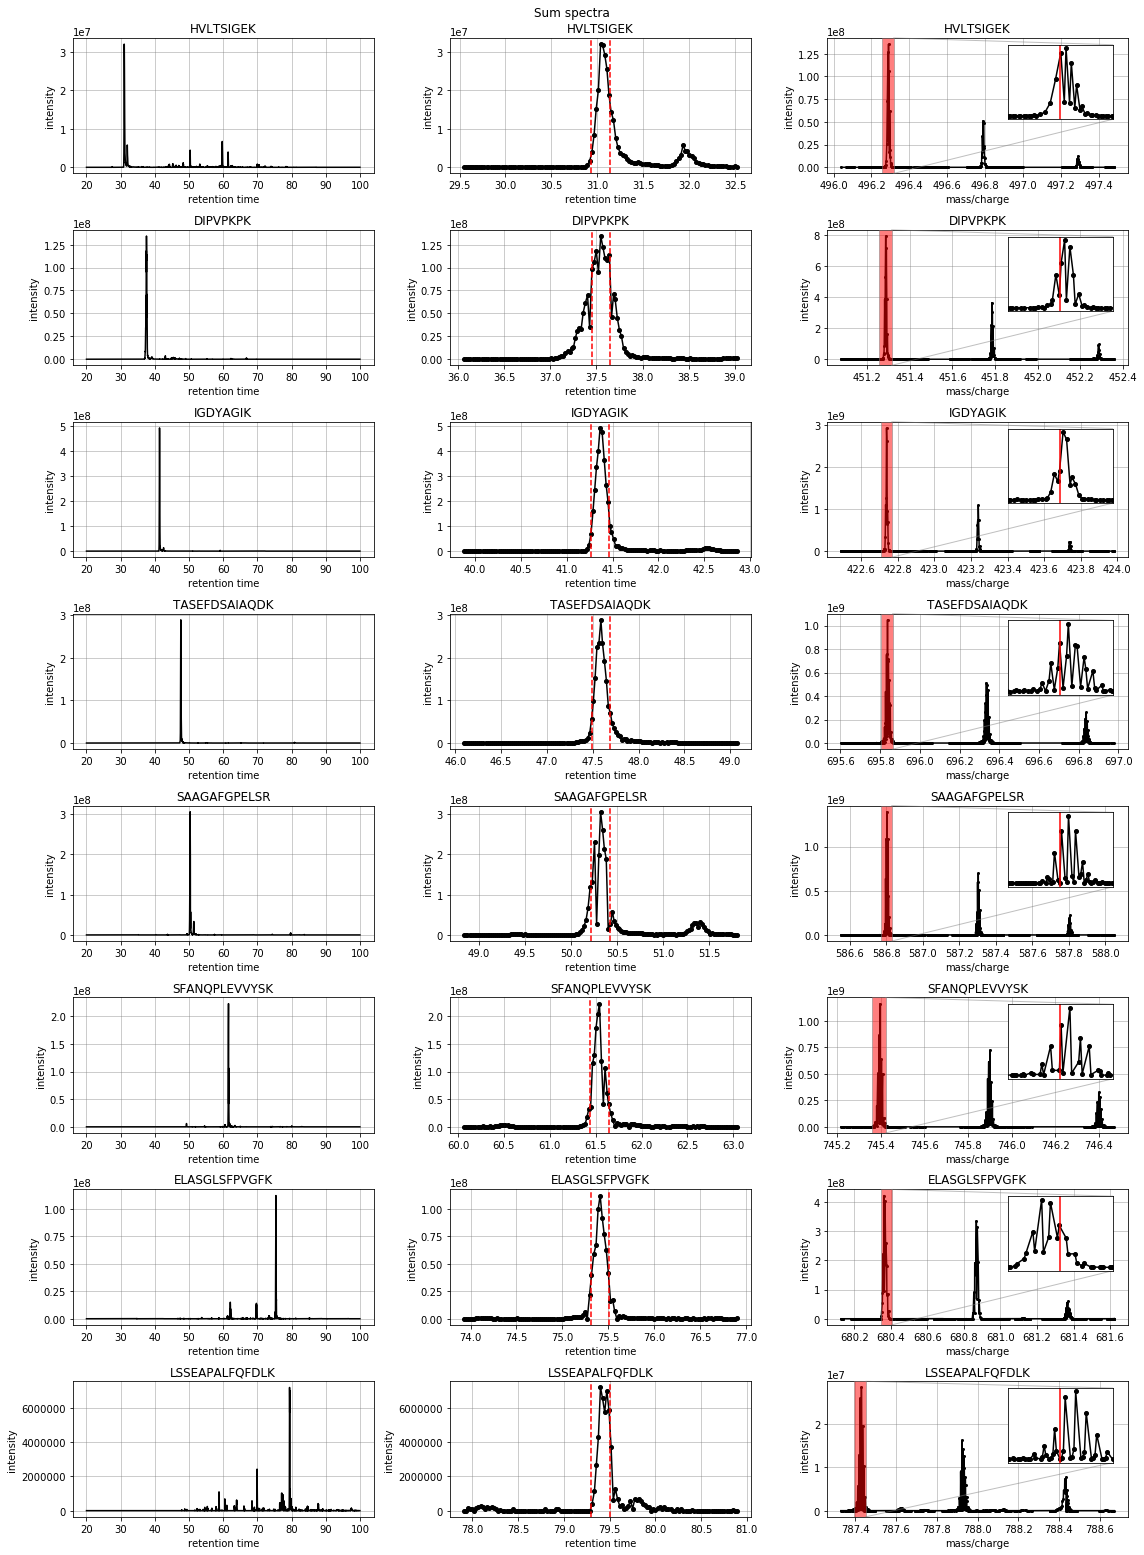

In [8]:
##SUM
f = plt.figure(figsize = (16,22))
axes = f.subplots(len(iRT_peptides.keys()), 3)
for plot_num, peptide in enumerate(iRT_peptides.keys()):
    m_z = iRT_peptides[peptide][0]
    rt = iRT_peptides[peptide][1]
    full_xic = pyextractMS.get_xic(mz_range=[m_z-mass_accuracy,m_z+mass_accuracy], rawfile_name=rawfile_name,
                                   retention_time_range=[20, 100])
    peak_max_rt, peak_max_intensity = pyextractMS.get_max_rt(full_xic)
    
    target_xic = pyextractMS.get_xic(mz_range=[m_z-mass_accuracy,m_z+mass_accuracy], rawfile_name=rawfile_name, 
                                    retention_time_range=[peak_max_rt-rt_window, peak_max_rt+rt_window])
    
    pyextractMS.plot_xic(full_xic, title=peptide, fig_ax=axes[plot_num,0], circle_size=0)
    pyextractMS.plot_xic(target_xic, title=peptide, fig_ax=axes[plot_num,1], circle_size=4)
    axes[plot_num,1].axvline(peak_max_rt-ms1_extraction_rt_window, linestyle='--', color='red')
    axes[plot_num,1].axvline(peak_max_rt+ms1_extraction_rt_window, linestyle='--', color='red')
    
    spectra = pyextractMS.extract_ms1(rawfile_name, [m_z-mz_offset/2, m_z+mz_offset*2.5], 
                                      [peak_max_rt-ms1_extraction_rt_window, peak_max_rt+ms1_extraction_rt_window], 
                                      sum_spectra=True, interp=False)
    pyextractMS.plot_ms_spectra(spectra, title=peptide, fig_ax=axes[plot_num,2], circle_size=2)
    # sub region of the original image
    axins = axes[plot_num,2].inset_axes([0.6, 0.4, 0.35, 0.55])
    pyextractMS.plot_ms_spectra(spectra, fig_ax=axins, title='', x_label='', y_label='', circle_size=4)
    axins.set_xlim([m_z-.03, m_z+.03])
    axins.set_xticks([])
    axins.set_yticks([])
    axins.axvline(m_z, color='red')
    axes[plot_num,2].indicate_inset_zoom(axins, facecolor='red')

f.suptitle('Sum spectra')
plt.tight_layout()
f.subplots_adjust(top=0.96)

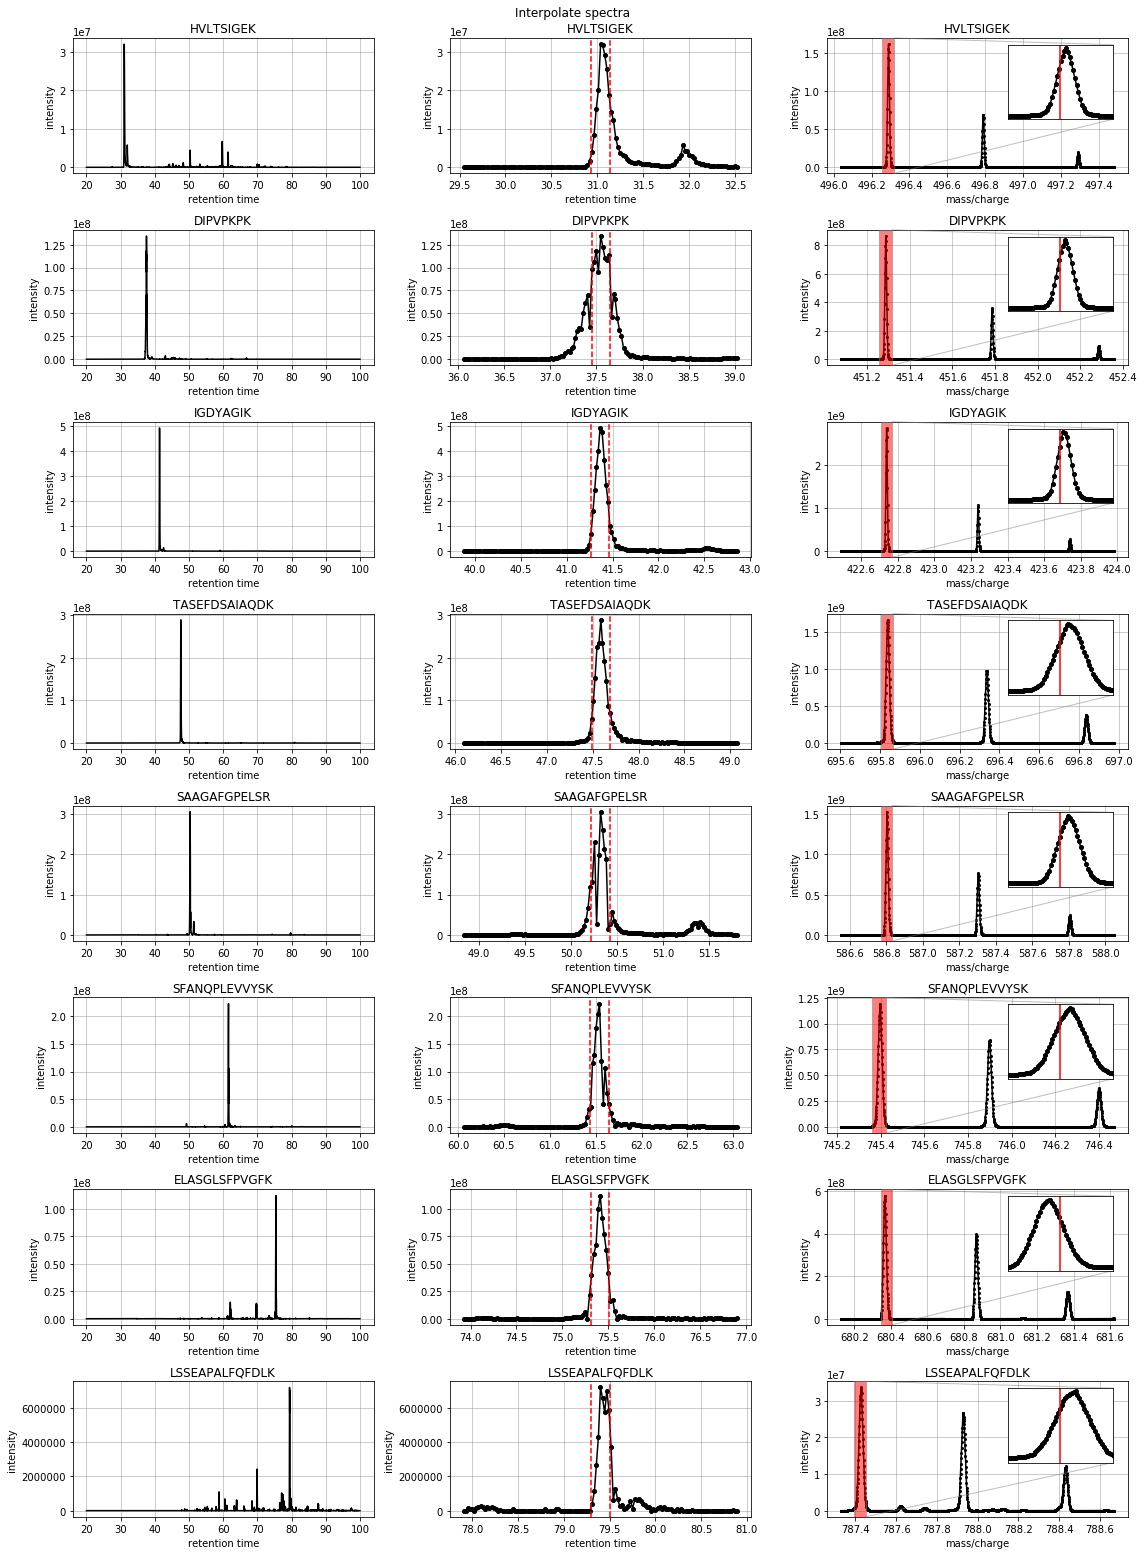

In [9]:
##INTERP AND SUM
f = plt.figure(figsize = (16,22))
axes = f.subplots(len(iRT_peptides.keys()), 3)
for plot_num, peptide in enumerate(iRT_peptides.keys()):
    m_z = iRT_peptides[peptide][0]
    rt = iRT_peptides[peptide][1]
    full_xic = pyextractMS.get_xic(mz_range=[m_z-mass_accuracy,m_z+mass_accuracy], rawfile_name=rawfile_name,
                                   retention_time_range=[20, 100])
    peak_max_rt, peak_max_intensity = pyextractMS.get_max_rt(full_xic)
    
    target_xic = pyextractMS.get_xic(mz_range=[m_z-mass_accuracy,m_z+mass_accuracy], rawfile_name=rawfile_name, 
                                    retention_time_range=[peak_max_rt-rt_window, peak_max_rt+rt_window])
    
    pyextractMS.plot_xic(full_xic, title=peptide, fig_ax=axes[plot_num,0], circle_size=0)
    pyextractMS.plot_xic(target_xic, title=peptide, fig_ax=axes[plot_num,1], circle_size=4)
    axes[plot_num,1].axvline(peak_max_rt-ms1_extraction_rt_window, linestyle='--', color='red')
    axes[plot_num,1].axvline(peak_max_rt+ms1_extraction_rt_window, linestyle='--', color='red')
    
    spectra = pyextractMS.extract_ms1(rawfile_name, [m_z-mz_offset/2, m_z+mz_offset*2.5], 
                                      [peak_max_rt-ms1_extraction_rt_window, peak_max_rt+ms1_extraction_rt_window], 
                                      sum_spectra=True, interp=True)
    pyextractMS.plot_ms_spectra(spectra, title=peptide, fig_ax=axes[plot_num,2], circle_size=2)
    # sub region of the original image
    axins = axes[plot_num,2].inset_axes([0.6, 0.4, 0.35, 0.55])
    pyextractMS.plot_ms_spectra(spectra, fig_ax=axins, title='', x_label='', y_label='', circle_size=4)
    axins.set_xlim([m_z-.03, m_z+.03])
    axins.set_xticks([])
    axins.set_yticks([])
    axins.axvline(m_z, color='red')
    axes[plot_num,2].indicate_inset_zoom(axins, facecolor='red')
    
f.suptitle('Interpolate spectra')
plt.tight_layout() 
f.subplots_adjust(top=0.96)